[View in Colaboratory](https://colab.research.google.com/github/onepixelm/hazi03/blob/master/Dixy4.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
def diff_true_pred(y_true, y_pred):
  return abs(y_true - y_pred)

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(100,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001), metrics=[diff_true_pred])

In [3]:
from google.colab import files

uploaded = files.upload()
file  = open("BP_d.txt", 'r')  
head = file.readlines()[1:] 
file.close()


Saving BP_d.txt to BP_d.txt


In [77]:
head2 = [ float(s.split(';')[1]) for s in head ]
print(len(head2))

min_temp = head2[0]
max_temp = head2[0]
for t in head2:
  if t < min_temp:
    min_temp = t
  if t > max_temp:
    max_temp = t
print("Min temp: {} Max temp: {}".format(min_temp,max_temp))
X_pred = (np.asarray([head2[-100:]]) - min_temp)/(max_temp - min_temp)
print(X_pred)
print(X_pred.shape)
head2 = [ head2[i*101:(i+1)*101] for i in range(len(head2)/101) ]
Y_temp = [ l[-1:] for l in head2 ]
#print(Y_temp)
X_temp = [ l[:-1] for l in head2 ]
#print(X_temp)

40177
Min temp: -20.6 Max temp: 33.1
[[0.68156425 0.7113594  0.7132216  0.6443203  0.6405959  0.63873371
  0.61080074 0.5698324  0.57728119 0.60893855 0.61266294 0.60148976
  0.5716946  0.61080074 0.60893855 0.5698324  0.55307263 0.5735568
  0.57914339 0.57541899 0.5679702  0.5679702  0.56424581 0.58845438
  0.57914339 0.56238361 0.56052142 0.55307263 0.52513966 0.53258845
  0.53631285 0.58286778 0.58472998 0.4972067  0.48230912 0.48417132
  0.4990689  0.50651769 0.52886406 0.54934823 0.57728119 0.59404097
  0.63873371 0.65363128 0.6443203  0.60893855 0.60893855 0.60521415
  0.59031657 0.55493482 0.58472998 0.62383613 0.63687151 0.65735568
  0.62011173 0.63500931 0.59404097 0.5735568  0.54748603 0.54376164
  0.56238361 0.51396648 0.47858473 0.48230912 0.4320298  0.40968343
  0.40037244 0.43389199 0.39106145 0.37057728 0.41154562 0.39292365
  0.3556797  0.34636872 0.45437616 0.54003724 0.54376164 0.46368715
  0.37802607 0.36685289 0.44320298 0.37243948 0.30540037 0.33519553
  0.30726257

In [78]:
import numpy as np
X_train = (np.asarray(X_temp[0:390]) - min_temp)/(max_temp - min_temp)
Y_train = (np.asarray(Y_temp[0:390]) - min_temp)/(max_temp - min_temp)
X_test = (np.asarray(X_temp[390:]) - min_temp)/(max_temp - min_temp)
Y_test = (np.asarray(Y_temp[390:]) - min_temp)/(max_temp - min_temp)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(390, 100)
(7, 100)
(390, 1)
(7, 1)


In [36]:
network_history = model.fit(X_train, Y_train, batch_size=60, epochs=200, verbose=1, validation_split=0.2)

Train on 312 samples, validate on 78 samples
Epoch 1/200
312/312 [==============================] - 0s 64us/step - loss: 0.0085 - diff_true_pred: 0.0732 - val_loss: 0.0073 - val_diff_true_pred: 0.0719
Epoch 2/200
312/312 [==============================] - 0s 54us/step - loss: 0.0085 - diff_true_pred: 0.0731 - val_loss: 0.0072 - val_diff_true_pred: 0.0717
Epoch 3/200
312/312 [==============================] - 0s 58us/step - loss: 0.0085 - diff_true_pred: 0.0730 - val_loss: 0.0072 - val_diff_true_pred: 0.0716
Epoch 4/200
312/312 [==============================] - 0s 55us/step - loss: 0.0085 - diff_true_pred: 0.0731 - val_loss: 0.0072 - val_diff_true_pred: 0.0715
Epoch 5/200
312/312 [==============================] - 0s 70us/step - loss: 0.0085 - diff_true_pred: 0.0730 - val_loss: 0.0072 - val_diff_true_pred: 0.0714
Epoch 6/200
312/312 [==============================] - 0s 50us/step - loss: 0.0085 - diff_true_pred: 0.0730 - val_loss: 0.0072 - val_diff_true_pred: 0.0713
Epoch 7/200
312/312

In [0]:
def plot_history(network_history):

  plt.figure()

  plt.xlabel('Epochs')

  plt.ylabel('Loss')
  plt.plot(network_history.history['loss'])
  plt.plot(network_history.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(network_history.history['diff_true_pred'])
  plt.plot(network_history.history['val_diff_true_pred'])
  plt.legend(['Training', 'Validation'])
  plt.show()

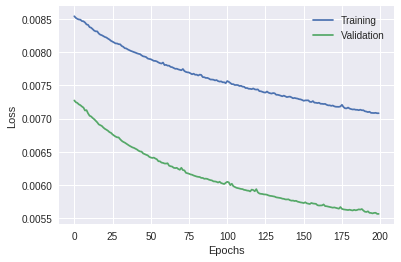

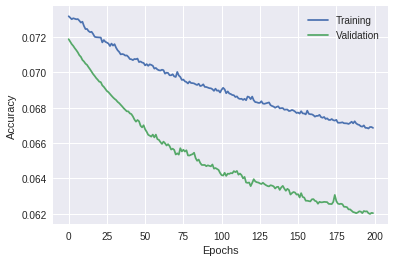

In [62]:
plot_history(network_history)

In [79]:
preds = model.predict(X_test)
print(preds.shape)

(7, 1)


In [80]:
for t in [ (preds[i][0]*(max_temp-min_temp)+min_temp, Y_test[i][0]*(max_temp-min_temp)+min_temp,(preds[i][0] - Y_test[i][0] )*(max_temp-min_temp) ) for i in range(7) ]:
  print(t)

(1.2840062379837036, -1.3000000000000007, 2.5840062379837034)
(17.017650806903838, 22.5, -5.4823491930961605)
(20.667718636989598, 25.0, -4.332281363010407)
(4.402147799730301, 0.1999999999999993, 4.2021477997303025)
(7.367151749134063, 12.300000000000004, -4.93284825086594)
(25.76200243830681, 24.800000000000004, 0.9620024383068028)
(9.015064686536789, 10.3, -1.2849353134632113)


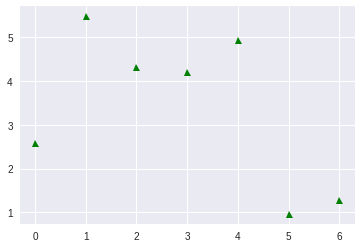

In [81]:

import numpy as np
import matplotlib.pyplot as plt

def dactivation(i):
    return (abs(preds[i][0] - Y_test[i][0]) *(max_temp-min_temp))

for i in range (7) : 
    plt.plot(i, dactivation(i) , 'g^')
plt.show()

In [82]:
preds = model.predict(X_pred)
print(preds,max_temp,min_temp)                                    # a következő napi predikált előrejelzés
print('the next day prediction:', preds*(max_temp-min_temp)+min_temp) # a következő napi predikált előrejelzés már renormálva

#preds_renorm = preds*(max_temp-min_temp)+min_temp

(array([[0.38341525]], dtype=float32), 33.1, -20.6)
('the next day prediction:', array([[-0.01060104]], dtype=float32))


In [83]:
for week in range (1,7):
    
    preds = model.predict(X_pred)
    X_pred_new = np.concatenate((X_pred, preds), axis=1)
 #   print (X_pred_new.shape)
 #   print (X_pred_new)
 #   X_pred = X_pred_new [-100:]
 #   print (X_pred.shape)
 #   print (X_pred)
    X_pred = np.delete(X_pred_new, 0, 1)
    
    print('the next day prediction', week, preds)

print('the next week prediction:', preds*(max_temp-min_temp)+min_temp) # a következő napi predikált előrejelzés már renormálva


('the next day prediction', 1, array([[0.38341525]], dtype=float32))
('the next day prediction', 2, array([[0.33360472]], dtype=float32))
('the next day prediction', 3, array([[0.35547495]], dtype=float32))
('the next day prediction', 4, array([[0.3315957]], dtype=float32))
('the next day prediction', 5, array([[0.28930694]], dtype=float32))
('the next day prediction', 6, array([[0.24579856]], dtype=float32))
('the next week prediction:', array([[-7.4006176]], dtype=float32))


In [86]:
for week in range (1,22):
    
    preds = model.predict(X_pred)
    X_pred_new = np.concatenate((X_pred, preds), axis=1)
    X_pred = np.delete(X_pred_new, 0, 1)
    
    print('the next day prediction', week, preds)

print('the next month prediction:', preds*(max_temp-min_temp)+min_temp) # a következő napi predikált előrejelzés már renormálva

('the next day prediction', 1, array([[0.35510278]], dtype=float32))
('the next day prediction', 2, array([[0.36843038]], dtype=float32))
('the next day prediction', 3, array([[0.25235358]], dtype=float32))
('the next day prediction', 4, array([[0.2656852]], dtype=float32))
('the next day prediction', 5, array([[0.32306343]], dtype=float32))
('the next day prediction', 6, array([[0.41422015]], dtype=float32))
('the next day prediction', 7, array([[0.32767224]], dtype=float32))
('the next day prediction', 8, array([[0.351222]], dtype=float32))
('the next day prediction', 9, array([[0.39813635]], dtype=float32))
('the next day prediction', 10, array([[0.2803288]], dtype=float32))
('the next day prediction', 11, array([[0.26821756]], dtype=float32))
('the next day prediction', 12, array([[0.38431194]], dtype=float32))
('the next day prediction', 13, array([[0.457014]], dtype=float32))
('the next day prediction', 14, array([[0.40127292]], dtype=float32))
('the next day prediction', 15, arr